In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
file_path="C:\\Users\\Krishang Virmani\\Desktop\\Git\\TA_Classes\\Sample Project\\btc_2h.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13203.06,827.053205
1,2018-01-01 07:30:00,13203.00,13611.27,13200.00,13410.03,849.151602
2,2018-01-01 09:30:00,13434.98,13699.00,13322.15,13558.99,745.036375
3,2018-01-01 11:30:00,13539.00,13818.55,13510.00,13570.35,557.178461
4,2018-01-01 13:30:00,13569.98,13735.24,13400.00,13616.99,484.909382
...,...,...,...,...,...,...
17837,2022-01-30 21:30:00,37977.47,38074.76,37751.72,37991.00,1141.092080
17838,2022-01-30 23:30:00,37991.00,38020.39,37442.52,37512.37,2210.156590
17839,2022-01-31 01:30:00,37512.37,37762.60,37351.63,37729.00,1911.983080
17840,2022-01-31 03:30:00,37729.00,38230.00,37625.41,37881.76,2463.470350


In [5]:
features=df[['open','high','low','volume']]

In [6]:
target=df['close']

In [7]:
features

,open,high,low,volume
0,13715.65,13715.65,13155.38,827.053205
1,13203.00,13611.27,13200.00,849.151602
2,13434.98,13699.00,13322.15,745.036375
3,13539.00,13818.55,13510.00,557.178461
4,13569.98,13735.24,13400.00,484.909382
...,...,...,...,...
17837,37977.47,38074.76,37751.72,1141.092080
17838,37991.00,38020.39,37442.52,2210.156590
17839,37512.37,37762.60,37351.63,1911.983080
17840,37729.00,38230.00,37625.41,2463.470350


In [8]:
target

0        13203.06
1        13410.03
2        13558.99
3        13570.35
4        13616.99
           ...   
17837    37991.00
17838    37512.37
17839    37729.00
17840    37881.76
17841    36821.05
Name: close, Length: 17842, dtype: float64

In [9]:
df['datetime']=pd.to_datetime(df['datetime'])

In [10]:
df['datetime']

0       2018-01-01 05:30:00
1       2018-01-01 07:30:00
2       2018-01-01 09:30:00
3       2018-01-01 11:30:00
4       2018-01-01 13:30:00
                ...        
17837   2022-01-30 21:30:00
17838   2022-01-30 23:30:00
17839   2022-01-31 01:30:00
17840   2022-01-31 03:30:00
17841   2022-01-31 05:30:00
Name: datetime, Length: 17842, dtype: datetime64[ns]

In [11]:
# df.set_index('datetime',inplace=True)

In [12]:
# df.set_index('datetime')

In [13]:
df

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13203.06,827.053205
1,2018-01-01 07:30:00,13203.00,13611.27,13200.00,13410.03,849.151602
2,2018-01-01 09:30:00,13434.98,13699.00,13322.15,13558.99,745.036375
3,2018-01-01 11:30:00,13539.00,13818.55,13510.00,13570.35,557.178461
4,2018-01-01 13:30:00,13569.98,13735.24,13400.00,13616.99,484.909382
...,...,...,...,...,...,...
17837,2022-01-30 21:30:00,37977.47,38074.76,37751.72,37991.00,1141.092080
17838,2022-01-30 23:30:00,37991.00,38020.39,37442.52,37512.37,2210.156590
17839,2022-01-31 01:30:00,37512.37,37762.60,37351.63,37729.00,1911.983080
17840,2022-01-31 03:30:00,37729.00,38230.00,37625.41,37881.76,2463.470350


In [14]:
df.set_index?

Signature:
df.set_index(
    keys,
    *,
    drop: 'bool' = True,
    append: 'bool' = False,
    inplace: 'bool' = False,
    verify_integrity: 'bool' = False,
) -> 'DataFrame | None'
Docstring:
Set the DataFrame index using existing columns.

Set the DataFrame index (row labels) using one or more existing
columns or arrays (of the correct length). The index can replace the
existing index or expand on it.

Parameters
----------
keys : label or array-like or list of labels/arrays
    This parameter can be either a single column key, a single array of
    the same length as the calling DataFrame, or a list containing an
    arbitrary combination of column keys and arrays. Here, "array"
    encompasses :class:`Series`, :class:`Index`, ``np.ndarray``, and
    instances of :class:`~collections.abc.Iterator`.
drop : bool, default True
    Delete columns to be used as the new index.
append : bool, default False
    Whether to append columns to existing index.
inplace : bool, default False
 

In [15]:
print(df.isnull().sum())

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


In [16]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=40)


In [17]:
x_train

,open,high,low,volume
15036,36293.53,36925.00,35956.68,5936.884207
1261,8144.41,8155.00,8064.52,2601.107453
8709,7236.60,7268.48,7228.40,1424.544165
17497,47173.44,47499.45,46970.05,1370.729710
14200,59554.68,59741.65,59307.35,3423.830788
...,...,...,...,...
11532,11599.91,11618.40,11581.95,2450.860622
16065,49917.54,50240.00,49777.00,2757.203680
14501,55152.43,55281.16,54400.00,4850.363517
14555,57797.35,57911.02,57275.00,2982.776494


In [18]:
scatter_matrix?

Signature:
scatter_matrix(
    frame: 'DataFrame',
    alpha: 'float' = 0.5,
    figsize: 'tuple[float, float] | None' = None,
    ax: 'Axes | None' = None,
    grid: 'bool' = False,
    diagonal: 'str' = 'hist',
    marker: 'str' = '.',
    density_kwds: 'Mapping[str, Any] | None' = None,
    hist_kwds: 'Mapping[str, Any] | None' = None,
    range_padding: 'float' = 0.05,
    **kwargs,
) -> 'np.ndarray'
Docstring:
Draw a matrix of scatter plots.

Parameters
----------
frame : DataFrame
alpha : float, optional
    Amount of transparency applied.
figsize : (float,float), optional
    A tuple (width, height) in inches.
ax : Matplotlib axis object, optional
grid : bool, optional
    Setting this to True will show the grid.
diagonal : {'hist', 'kde'}
    Pick between 'kde' and 'hist' for either Kernel Density Estimation or
    Histogram plot in the diagonal.
marker : str, optional
    Matplotlib marker type, default '.'.
density_kwds : keywords
    Keyword arguments to be passed to kernel 

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

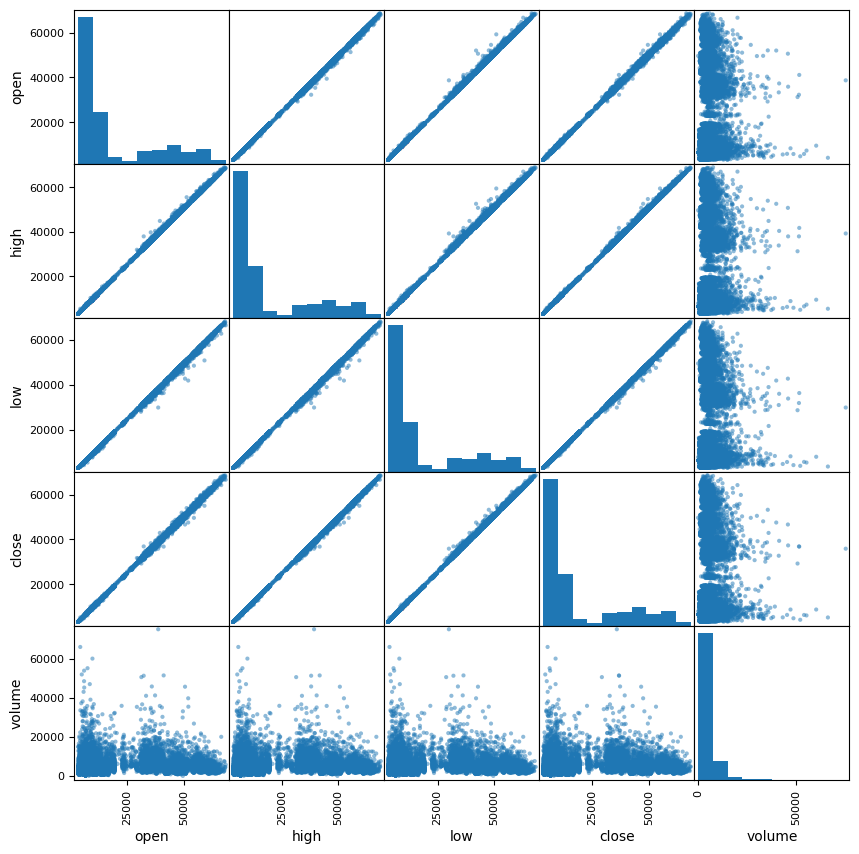

In [19]:
scatter_matrix(df,alpha=0.5,figsize=(10,10))

In [18]:
u = x_test.mean()
std = x_test.std()
x_test = (x_test-u)/std
y_test = (y_test-y_test.mean())/y_test.std()

u = x_train.mean()
std = x_train.std()
x_train = (x_train-u)/std
y_train = (y_train-y_train.mean())/y_train.std()

In [19]:
x_train, y_train

(           open      high       low    volume
 15036  0.977096  0.995286  0.976803  0.359586
 1261  -0.596071 -0.599201 -0.596484 -0.484675
 8709  -0.646805 -0.648334 -0.643646 -0.782455
 17497  1.585140  1.581341  1.598023 -0.796075
 14200  2.277089  2.259827  2.293921 -0.276450
 ...         ...       ...       ...       ...
 11532 -0.402954 -0.407253 -0.398079 -0.522702
 16065  1.738499  1.733228  1.756352 -0.445169
 14501  2.031061  2.012618  2.017117  0.084595
 14555  2.178877  2.158370  2.179285 -0.388078
 11590 -0.414084 -0.418672 -0.416462  0.737527
 
 [14273 rows x 4 columns],
 15036    36754.40
 1261      8124.87
 8709      7264.06
 17497    47273.24
 14200    59417.63
            ...   
 11532    11590.26
 16065    50099.34
 14501    54726.35
 14555    57415.60
 11590    11323.22
 Name: close, Length: 14273, dtype: float64)

In [20]:
linearmodel=LinearRegression()
linearmodel.fit(x_train,y_train)

LinearRegression()

In [21]:
linear_predictions=linearmodel.predict(x_test)


In [22]:
linear_predictions

array([11366.78586212,  6367.11914007,  3422.64536112, ...,
        7142.77236832, 10958.09237325,  6661.37360737])

In [23]:
rmse=mean_squared_error?

Signature:
mean_squared_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    squared=True,
)
Docstring:
Mean squared error regression loss.

Read more in the :ref:`User Guide <mean_squared_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

squared : bool, default=Tr

In [24]:
rmse=mean_squared_error(y_test,linear_predictions,squared=False)

In [25]:
rmse

179.58059350462452

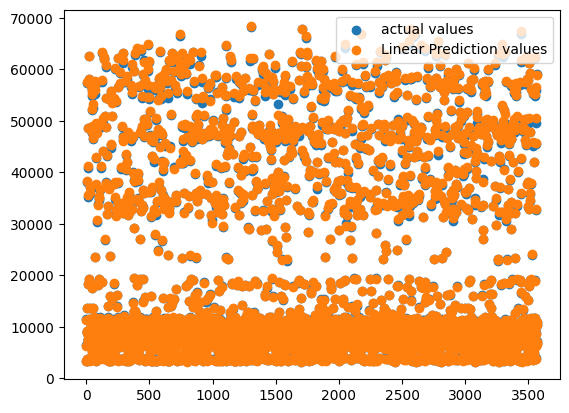

In [26]:
plt.scatter(range(len(y_test)),y_test.values,label="actual values")
plt.scatter(range(len(y_test)),linear_predictions,label="Linear Prediction values")
plt.legend()
plt.show()

In [27]:
model=Sequential()
model.add(Dense(64,input_dim=features.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

In [28]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [29]:
model.compile?

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_t

In [30]:
earlystopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [31]:
x_train

,open,high,low,volume
15036,0.977096,0.995286,0.976803,0.359586
1261,-0.596071,-0.599201,-0.596484,-0.484675
8709,-0.646805,-0.648334,-0.643646,-0.782455
17497,1.585140,1.581341,1.598023,-0.796075
14200,2.277089,2.259827,2.293921,-0.276450
...,...,...,...,...
11532,-0.402954,-0.407253,-0.398079,-0.522702
16065,1.738499,1.733228,1.756352,-0.445169
14501,2.031061,2.012618,2.017117,0.084595
14555,2.178877,2.158370,2.179285,-0.388078


In [32]:
x_train_np,y_train_np=x_train.to_numpy(),y_train.to_numpy()
x_test_np,y_test_np=x_test.to_numpy(),y_test.to_numpy()




In [33]:
x_train_np

array([[ 0.97709591,  0.99528554,  0.97680258,  0.3595862 ],
       [-0.59607078, -0.59920132, -0.59648368, -0.48467536],
       [-0.64680546, -0.6483339 , -0.6436459 , -0.78245522],
       ...,
       [ 2.03106113,  2.01261804,  2.0171172 ,  0.08459548],
       [ 2.17887748,  2.15836976,  2.17928456, -0.38807762],
       [-0.41408352, -0.41867237, -0.41646155,  0.73752719]])

In [34]:
# x_train_np=np.array(x_train)


In [35]:
model.fit(x_train_np,y_train_np,epochs=100,batch_size=30,validation_data=(x_test_np,y_test_np),callbacks=[earlystopping])

Epoch 1/100
476/476 [==============================] - 1s 1ms/step - loss: 556035392.0000 - val_loss: 184073328.0000
Epoch 2/100
476/476 [==============================] - 1s 1ms/step - loss: 35954176.0000 - val_loss: 13889491.0000
Epoch 3/100
476/476 [==============================] - 1s 1ms/step - loss: 10862020.0000 - val_loss: 8366251.0000
Epoch 4/100
476/476 [==============================] - 1s 1ms/step - loss: 5752863.5000 - val_loss: 4464003.5000
Epoch 5/100
476/476 [==============================] - 1s 1ms/step - loss: 3220706.2500 - val_loss: 2427232.5000
Epoch 6/100
476/476 [==============================] - 1s 1ms/step - loss: 1523389.2500 - val_loss: 1053195.2500
Epoch 7/100
476/476 [==============================] - 1s 1ms/step - loss: 645130.5625 - val_loss: 477689.8750
Epoch 8/100
476/476 [==============================] - 1s 1ms/step - loss: 296300.1562 - val_loss: 249545.2656
Epoch 9/100
476/476 [==============================] - 1s 1ms/step - loss: 157330.3906 - val_

In [108]:
ann_predictions=model.predict(x_test_np)

112/112 [==============================] - 0s 680us/step


In [109]:
ann_rmse=mean_squared_error(y_test_np,ann_predictions,squared=False)

In [110]:
ann_rmse, rmse

(0.008009767751659166, 0.007523848338004306)